# Affinity for Lollipop plot

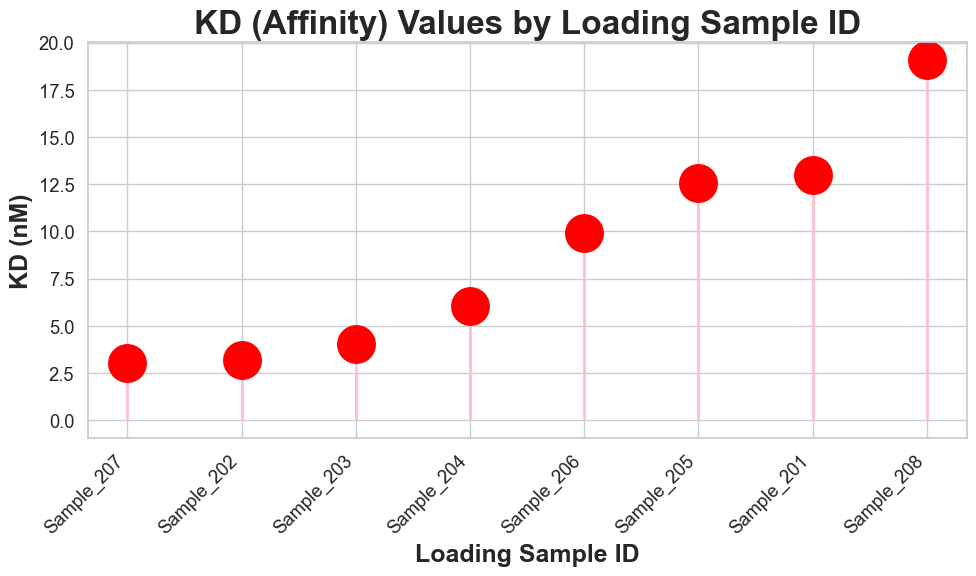

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
df_Octet = pd.read_excel('AHC_ExcelReport.xls', sheet_name="Result Table", usecols=[5,10,13,15,16,17,19,21]).groupby("Loading Sample ID").max()
df_Octet['KD (nM)'] = df_Octet['KD (M)'] * 1.0E9
df_Octet['kon(1/Ms)_1.0E+6'] = df_Octet['kon(1/Ms)'] * 1.0E-6
df_Octet['kdis(1/s)_1.0E-6'] = df_Octet['kdis(1/s)'] * 1.0E6
df_Octet.reset_index(inplace=True)
df_Octet_revise = df_Octet[['Sample ID', 'Loading Sample ID', 'Response', 'KD (nM)', 'kon(1/Ms)_1.0E+6', 'kdis(1/s)_1.0E-6']].copy()

# Setting the style and context
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Plotting
plt.figure(figsize=(10, 6))

# Sort values for better visual
df_Octet_revise_sorted = df_Octet_revise.sort_values('KD (nM)')

# Create a lollipop plot
markerline, stemlines, baseline = plt.stem(df_Octet_revise_sorted['Loading Sample ID'], df_Octet_revise_sorted['KD (nM)'], basefmt=" ")

# Customize the appearance
plt.setp(markerline, marker='o', markersize=25, markeredgewidth=3, color='red')
plt.setp(stemlines, linewidth=2, color='pink')

# Customizing the plot
plt.title('KD (Affinity) Values by Loading Sample ID', fontsize=24, weight='bold')
plt.xlabel('Loading Sample ID', fontsize=18, weight='bold')
plt.ylabel('KD (nM)', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right')

# Adjusting layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


# Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
df_Octet_corr = df_Octet.corr()

# Set the style and context
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_Octet_corr, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

# Customizing the heatmap
heatmap.set_title('Correlation Matrix of Octet Data', fontsize=18, weight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

# Adjusting layout for better fit
plt.tight_layout()

# Showing the plot
plt.show()
